<a href="https://colab.research.google.com/github/RusMermaid/Data_science_course_teaching/blob/main/L7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install --upgrade joblib==1.1.0;

In [ ]:
!pip install mglearn

Гвидо, Мюллер: Машинное обучение с помощью Python. Руководство для специалистов по работе с данными

In [ ]:
import mglearn

In [ ]:
import pandas as pd
import sklearn
pd.set_option('display.max_columns', 100)

Построение дерева решений - построение последовательности правил «если… то…».

Данные могут быть представлены  в виде бинарных признаков с делением по да/нет,  и в виде непрерывных признаков, с делением: «Признак i больше значения a?

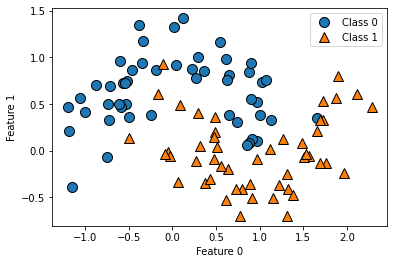

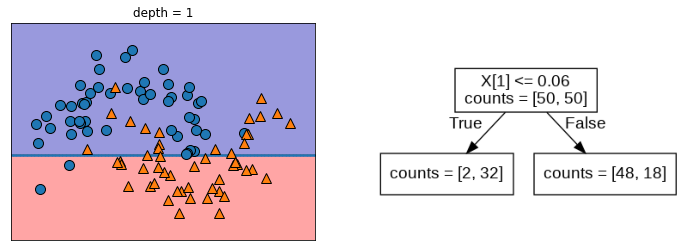

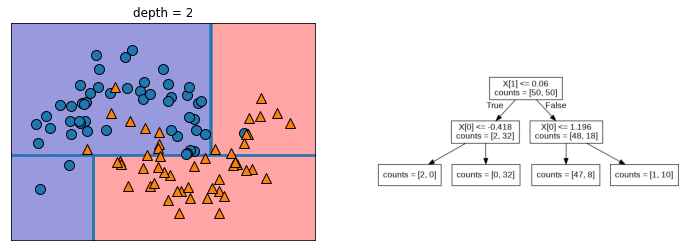

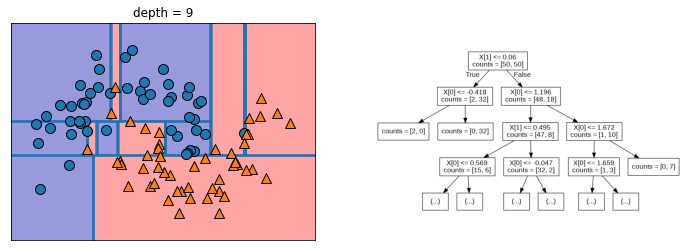

In [ ]:
mglearn.plots.plot_tree_progressive()

Как получить прогноз для нового примера данных:

1. Провести пример через разделяющие вопросы дерева и определить область, в которую попадает  пример.

Для задачи классификации:

    2. Определить класс к которому относится большинство примеров из трейна в   данной области.

    3. Этот класс и будет предсказанием для данного нового примера.

Для задачи регрессии:

    2. Усреднить значение целевой регрессионной метки по всем примером попавшим в трейне в данную область.
    
    3. Это среднее значение метки и будет предсказанием для данного нового примера. 

Построим пример решающего дерева для задачи определения злокачественности опухоли по датасету breast_cancer

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [ ]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
cancer_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)

In [ ]:
cancer_df['benign, malignant'] = cancer.target

In [ ]:
cancer_df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,"benign, malignant"
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
cancer_df.shape

(569, 31)

In [ ]:
cancer_df['benign, malignant'].value_counts()

1    357
0    212
Name: benign, malignant, dtype: int64

Decision trees

Построим решающее дерево без ограничений на глубину

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(tree.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(tree.score(X_test, y_test)))

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.937


Как и следовало ожидать, правильность на обучающем наборе получилась 100%, так как, ни чем не ограниченное дерево росло до тех пор, пока не стало идеально работать на трейне.

Попробуем теперь ограничить глубину дерева:

In [ ]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(tree.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(tree.score(X_test, y_test)))

Правильность на обучающем наборе: 0.988
Правильность на тестовом наборе: 0.951


Ограничение глубины
дерева уменьшает переобучение. Это приводит к более низкому результату на обучающем наборе, но улучшает результат на тестовом наборе

После обучения дерева полезно смотреть на  важность признаков (feature
importance), которая показывает, как дерево при построении использовало каждый признак.

Важность признака - число  в диапазоне от 0 до 1 для каждого признака, где 0 означает «не используется вообще», а 1 означает, что «отлично предсказывает целевую переменную». 

Важности признаков в сумме всегда дают 1:

In [ ]:
for name, score in zip(cancer["feature_names"], tree.feature_importances_): print(name, score)

mean radius 0.0
mean texture 0.0
mean perimeter 0.0
mean area 0.0
mean smoothness 0.0
mean compactness 0.0
mean concavity 0.0
mean concave points 0.0
mean symmetry 0.0
mean fractal dimension 0.0
radius error 0.010197368202069328
texture error 0.0483982536186494
perimeter error 0.0
area error 0.0
smoothness error 0.002415595085315826
compactness error 0.0
concavity error 0.0
concave points error 0.0
symmetry error 0.0
fractal dimension error 0.0
worst radius 0.7268285094603201
worst texture 0.045815897088866304
worst perimeter 0.0
worst area 0.0
worst smoothness 0.014157702104714051
worst compactness 0.0
worst concavity 0.0181879968644502
worst concave points 0.12211319926548449
worst symmetry 0.01188547831013032
worst fractal dimension 0.0


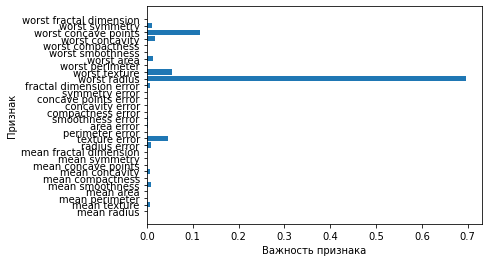

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importances_cancer(model):
  n_features = cancer.data.shape[1]
  
  plt.barh(range(n_features), model.feature_importances_, align='center')
  plt.yticks(np.arange(n_features), cancer.feature_names)
  plt.xlabel("Важность признака")
  plt.ylabel("Признак")
plot_feature_importances_cancer(tree)

Однако, если признак имеет низкое значение feature_importance_,
это не значит, что он неинформативен. Это означает только то, что
данный признак не был выбран деревом, поскольку, вероятно, другой
признак содержит ту же самую информацию.

Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=42)

forest = RandomForestClassifier(n_estimators=5, max_depth=5, random_state=2)  #max_depth=5, 
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=5, random_state=2)

n_estimators - параметр, в котором мы передаем сколько мы хотим получить деревьев.

Визуализируем границы принятия решений, полученные каждым деревом, а затем выведем агрегированный прогноз, выданный лесом

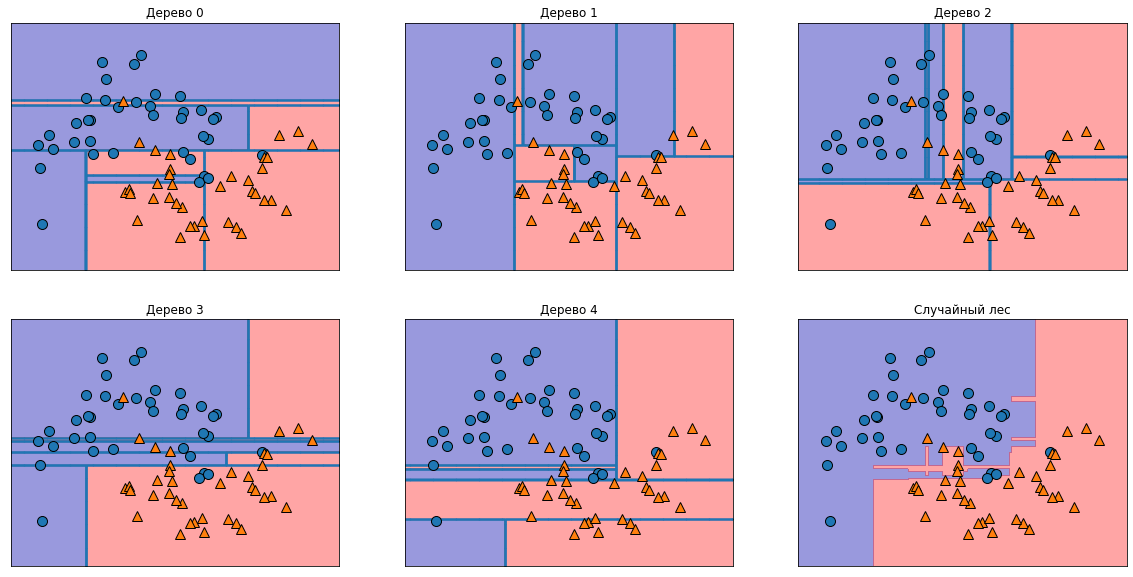

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
  ax.set_title("Дерево {}".format(i))
  mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],alpha=.4)
axes[-1, -1].set_title("Случайный лес")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

Посмотрим, как лес работает на тестовом наборе:

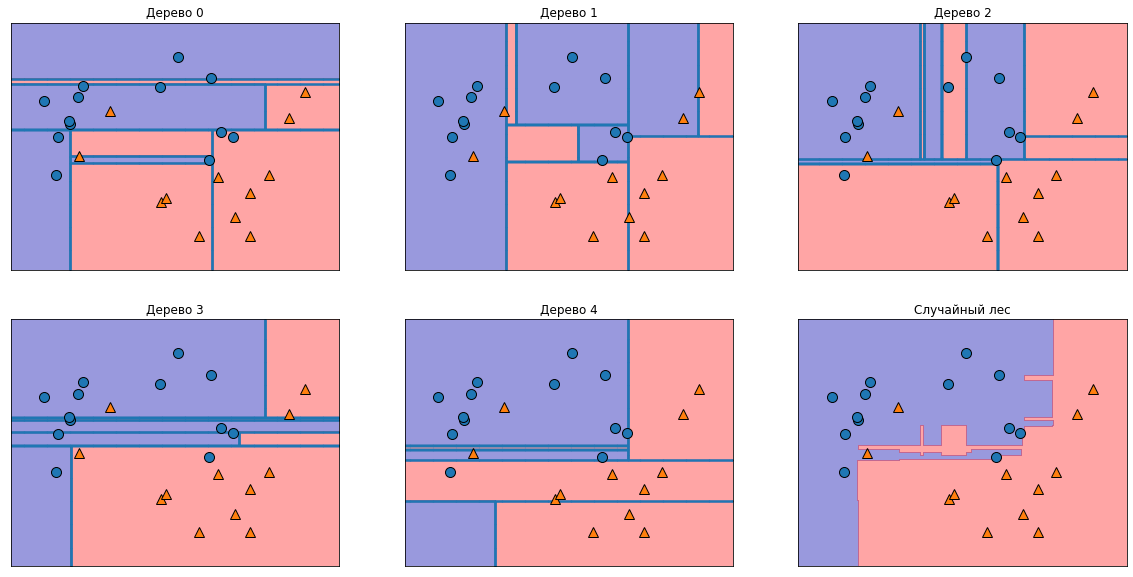

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
  ax.set_title("Дерево {}".format(i))
  mglearn.plots.plot_tree_partition(X_test, y_test, tree, ax=ax)
mglearn.plots.plot_2d_separator(forest, X_test, fill=True, ax=axes[-1, -1],alpha=.4)
axes[-1, -1].set_title("Случайный лес")
mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test)

Для интереса можно построить другой набор данных с теми же параметрами распределения, но другой случайностью. Это будет наш тестовый набор, и мы можем увидеть, как работает наш лес на тесте.

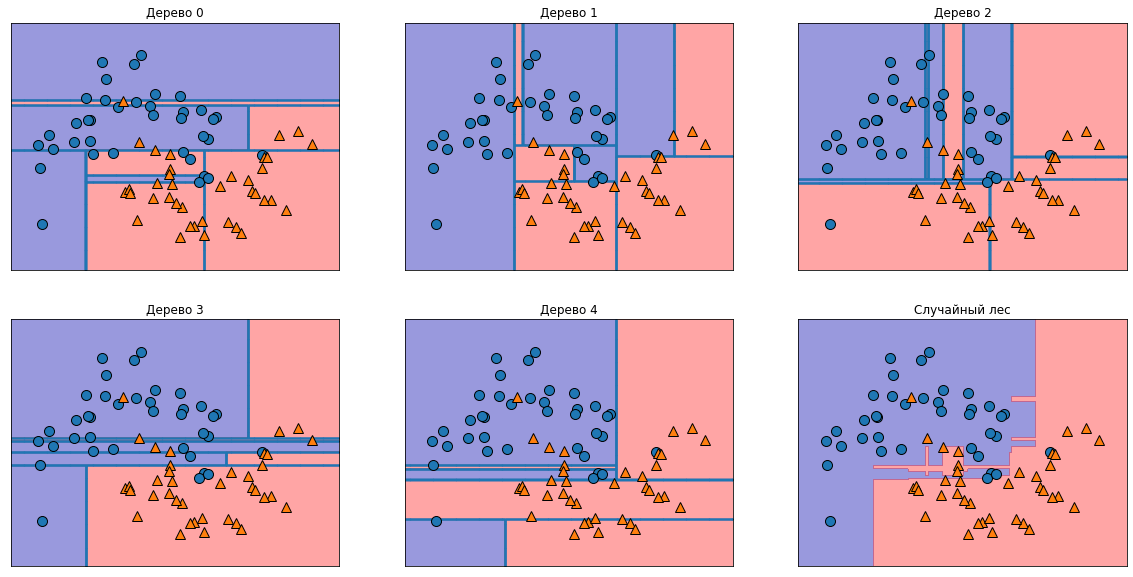

In [ ]:
X, y = make_moons(n_samples=75, noise=0.25, random_state=2)
#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=42)

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
  ax.set_title("Дерево {}".format(i))
  mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],alpha=.4)
axes[-1, -1].set_title("Случайный лес")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

На рисунках отчетливо видно, что границы принятия решений,
полученные с помощью пяти деревьев, существенно различаются между
собой. Каждое дерево совершает ряд ошибок, поскольку из-за бутстрепа
некоторые точки исходного обучающего набора фактически не были
включены в обучающие наборы, по которым строились деревья.
В отличие от отдельных деревьев случайный лес переобучается в
меньшей степени и дает гораздо более чувствительную (гибкую) границу
принятия решений. В реальных примерах используется гораздо большее
количество деревьев (часто сотни или тысячи), что приводит к
получению еще более чувствительной границы.

В качестве еще одного примера давайте построим случайный лес,
состоящий из 100 деревьев, на наборе данных Breast Cancer:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(forest.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(forest.score(X_test, y_test)))

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.972


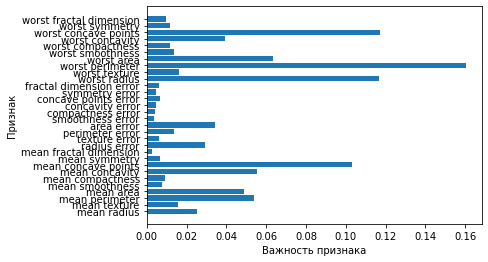

In [ ]:
def plot_feature_importances_cancer(model):
  n_features = cancer.data.shape[1]
  plt.barh(range(n_features), model.feature_importances_, align='center')
  plt.yticks(np.arange(n_features), cancer.feature_names)
  plt.xlabel("Важность признака")
  plt.ylabel("Признак")
plot_feature_importances_cancer(forest)

На рисунке видно, что в отличие от одиночного дерева решения
случайный лес вычисляет ненулевые значения важностей для гораздо
большего числа признаков. 

Как и дерево решений, случайный лес также присваивает высокое значение важности признаку «worst radius», однако в качестве наиболее информативного признака выбирает «worst perimeter». 

Случайность, лежащая в основе случайного леса, заставляет алгоритм рассматривать множество возможных интерпретаций. Это приводит к тому, что случайный лес дает гораздо более широкую картину данных, чем одиночное дерево.

Градиентный бустинг

XGBoost

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
# Данные библиотеки могут быть не установленны. 
# Установите их через pip install/ conda install
import xgboost
import lightgbm as lgb
from catboost import CatBoostClassifier

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
'''
Мы можем добавлять параметры модели с помощью словаря параметров. 
Это удобно т.к. в бустинговых моделях параметров намного больше, чем в линейных

'''


params = { 
    'eta': 0.07, #то же самое, что и learning rate
    'max_depth': 5, 
    'objective': 'binary:logistic',
    'eval_metric': 'Logloss',
    'seed': 7}


model = xgboost.XGBClassifier(num_round = 100)
model.fit(X_train, y_train,  eval_set=[(X_test, y_test)])

In [ ]:
y_predict_test = model.predict(X_test)
y_predict_train = model.predict(X_train)

print("Правильность на обучающем наборе: {:.3f}".format(accuracy_score(y_train, y_predict_train)))
print("Правильность на тестовом наборе: {:.3f}".format(accuracy_score(y_test, y_predict_test)))


Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.979


CatBoost

In [ ]:
model_cat = CatBoostClassifier(iterations=100,
                           learning_rate=0.07, 
                           depth=5, 
                           eval_metric = 'AUC',
                           loss_function='Logloss',
                          random_state=7)
model_cat.fit(X_train, y_train, eval_set=(X_test, y_test), use_best_model=True)

In [ ]:
y_predict_test = model_cat.predict(X_test)
y_predict_train = model_cat.predict(X_train)

print("Правильность на обучающем наборе: {:.3f}".format(accuracy_score(y_train, y_predict_train)))
print("Правильность на тестовом наборе: {:.5f}".format(accuracy_score(y_test, y_predict_test)))

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.96503


lightgbm

In [ ]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)


params = {'max_depth':5, #глубина деревьев
    'boosting_type': 'gbdt', #модель для бустинга, в данном случае - gradient bosting decision tree
    'objective': 'binary', #задача
    'metric': ['auc'], #метрика качества
    'learning_rate': 0.07, #
     'seed': 7}

In [ ]:
gbm = lgb.train(params, lgb_train,
            num_boost_round=100, #количество построений-улучшений алгоритма
            valid_sets=[lgb_train, lgb_eval],
            early_stopping_rounds=10 #после этого количества одинаковых результатов, алгоритм досрочно закончит обучение
               )

In [ ]:
y_predict_test = gbm.predict(X_test)

for i in range(len(y_predict_test)):
    if y_predict_test[i]<0.5:
        y_predict_test[i]=0
    else:
        y_predict_test[i] = 1

#print("Правильность на обучающем наборе: {:.3f}".format(accuracy_score(y_train, y_predict_train)))
print("Правильность на тестовом наборе: {:.5f}".format(accuracy_score(y_test, y_predict_test)))

Правильность на тестовом наборе: 0.96503
